In [2]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl

In [3]:
df = pd.read_csv("./a1_data/a1_d2.csv",sep=",",header=None)

In [4]:
df.columns=['F1','F2','F3','C']

In [5]:
df_train=df.iloc[300:, :]
df_test=df.iloc[0:300, :]

In [6]:
df_test

,F1,F2,F3,C
0,-6.672418,-1.206198,-1.081050,0
1,1.675598,0.614994,-0.971600,0
2,-4.039058,0.335102,0.544618,1
3,0.793526,-0.235277,0.551771,1
4,3.820273,-0.274691,0.454743,1
...,...,...,...,...
295,1.506052,1.174034,1.624770,1
296,1.409654,1.815033,-1.120982,0
297,0.251425,1.883749,-1.364541,0
298,-4.672151,2.926241,-1.002955,0


In [7]:
df1=df_train[df_train['C']==0]
df2=df_train[df_train['C']==1]

In [8]:
m0=df1.mean().values.reshape(4,1)
m0=m0[0:3]
m1=df2.mean().values.reshape(4,1)
m1=m1[0:3]
print(m0)

[[ 0.06598061]
 [ 0.10635453]
 [-1.01042327]]


In [9]:
X0=df1.iloc[:,0:3]
X1=df2.iloc[:,0:3]

In [10]:
x=X0[0:1].values.reshape(3,1)
print(X0.size)
print(x-m0)

1029
[[-1.26058747]
 [-0.38753625]
 [-0.09248594]]


In [11]:
within_class_scatter_matrix=np.zeros((3,3))
print(m1)
s=np.zeros((3,3))
for i in range(0,(int)((X0.size)/3)):
    x=X0[i:i+1].values.reshape(3,1)
    a=(x-m0).dot((x-m0).T)
    #print(a)
    s+=a
within_class_scatter_matrix+=s
s=np.zeros((3,3))
for i in range(0,(int)((X1.size)/3)):
    x=X1[i:i+1].values.reshape(3,1)
    s+=(x-m1).dot((x-m1).T)
within_class_scatter_matrix+=s

[[ 0.14100976]
 [-0.00173846]
 [ 1.00189747]]


In [12]:
within_class_scatter_matrix

array([[6398.58081858, -101.91781814,   45.78257923],
       [-101.91781814,  651.43578143,   13.50390059],
       [  45.78257923,   13.50390059,   59.43677842]])

In [13]:
m=m0-m1
print(m)

[[-0.07502915]
 [ 0.10809298]
 [-2.01232074]]


In [14]:
w=np.linalg.inv(within_class_scatter_matrix).dot(m)

In [15]:
w

array([[ 0.00024795],
       [ 0.00091482],
       [-0.03425532]])

In [16]:
points0=w.T.dot(X0.T)
points1=w.T.dot(X1.T)

In [17]:
points0[0].size

343

In [18]:
def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])

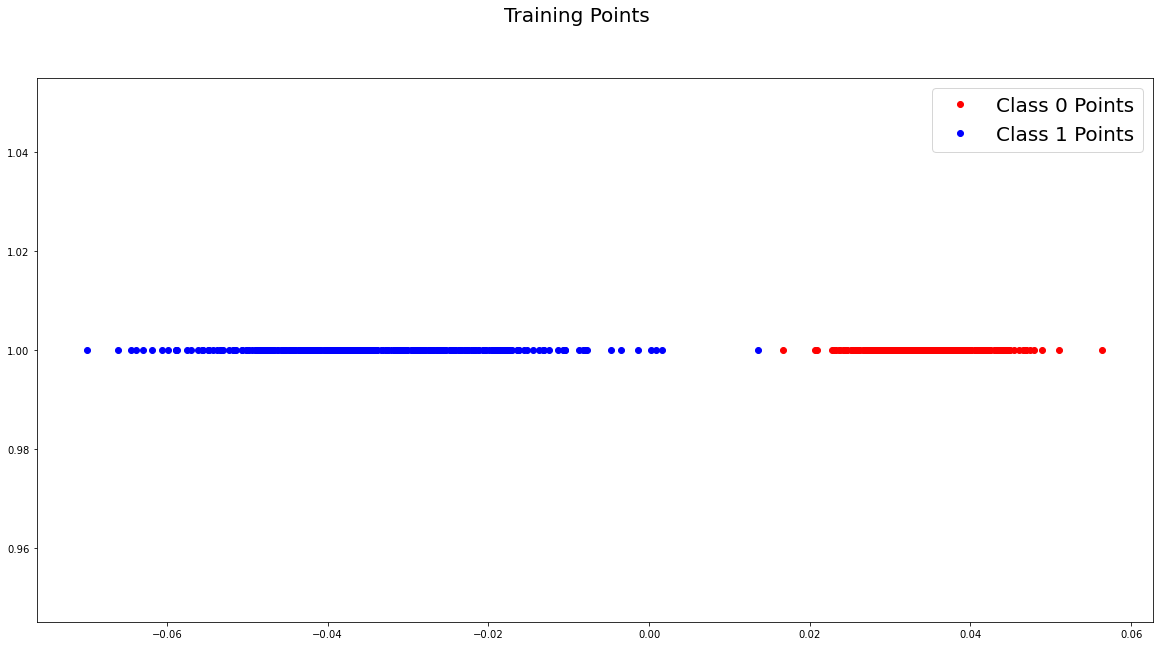

In [31]:
plt.figure(figsize=(20,10))
plt.plot(points0[0],[1]*points0[0].size,'ro',label='Class 0 Points')
plt.plot(points1[0],[1]*points1[0].size,'bo',label='Class 1 Points')
plt.legend(prop={'size':20})
plt.suptitle("Training Points",fontsize=20)
plt.savefig('Line2')
plt.show()

[0.09350552 0.01227073]
[0.01227073]


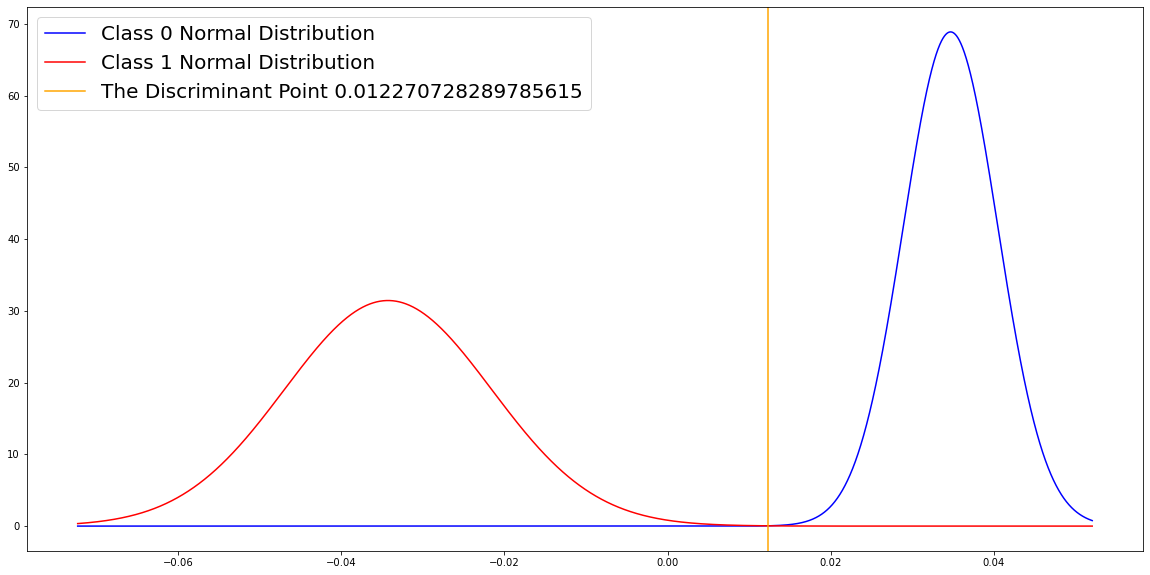

In [20]:
h0=sorted(points0[0])
h1=sorted(points1[0])
m11=np.mean(h0)
m2=np.mean(h1)
std1=np.std(h0)
std2=np.std(h1)
result = solve(m11,m2,std1,std2)
print(result)
a=min(m11-3*std1,m2-3*std2)
b=max(m11+3*std1,m2+3*std2)
x=np.linspace(a,b,10000)
plt.figure(figsize=(20,10))
fit0 = stats.norm.pdf(x, np.mean(h0), np.std(h0))
fit1 = stats.norm.pdf(x, np.mean(h1), np.std(h1))
plt.plot(x,fit0,'b-',label='Class 0 Normal Distribution')
plt.plot(x,fit1,'r-',label='Class 1 Normal Distribution')
result=result[1:]
print(result)
plt.axvline(result,label='The Discriminant Point '+str(result[0]),c="orange")
plt.legend(prop={'size':20})
plt.savefig("Normal2")
plt.show()           

In [21]:
x=df_test.iloc[:,0:3]
t=df_test.iloc[:,3:]
p0=result[0]
points=w.T.dot(x.T)
pred=[]
m=0
c=0
for p in points[0]:
    if(p>p0):
        pred.append(0)
    else:
        pred.append(1)

In [22]:
tn=0
tp=0
fn=0
fp=0
c=0
for i in range(0,len(pred)):
    if(pred[i]==t[c:c+1].values.reshape(1,1)):
        if(t[c:c+1].values.reshape(1,1)==1):
            tp+=1
        else:
            tn+=1
    else:
        if(t[c:c+1].values.reshape(1,1)==1):
            fn+=1
        else:
            fp+=1
    c=c+1
pr=tp/(tp+fp)
re=tp/(tp+fn)
print("Accuracy: ",(tp+tn)/(tp+tn+fp+fn))
print("Precision: ",pr)
print("recall: ",re)
print("F-Score: ",2*pr*re/(pr+re))

Accuracy:  1.0
Precision:  1.0
recall:  1.0
F-Score:  1.0


In [23]:
pred=[]
pp=[]
m=0
c=0
for p in points[0]:
    if(p>p0):
        pred.append(p)
    else:
        pp.append(p)

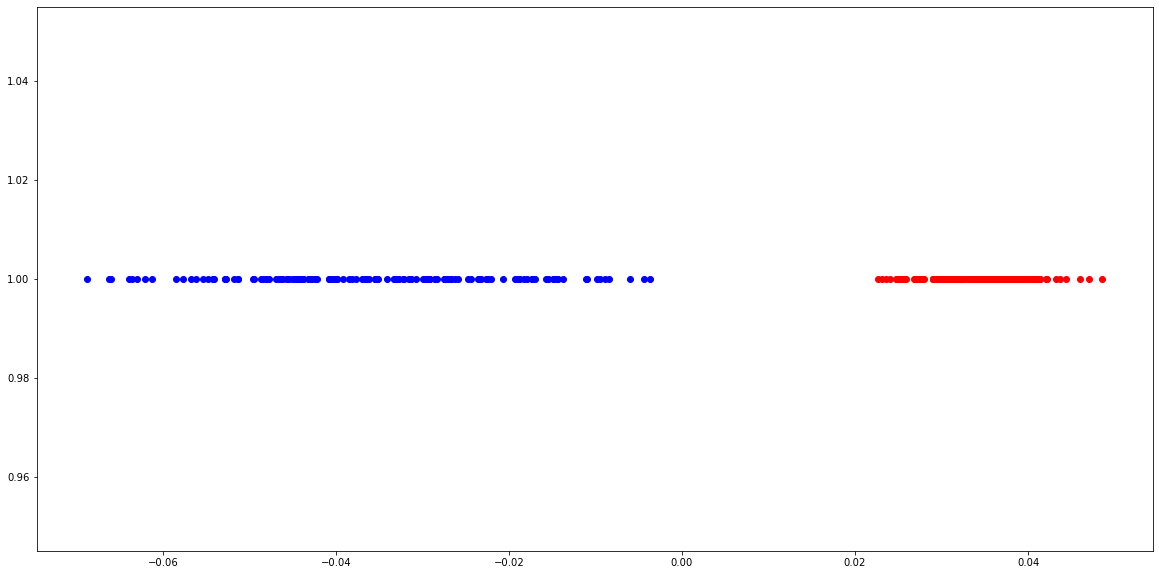

In [24]:
plt.figure(figsize=(20,10))
plt.plot(pred,[1]*len(pred),'ro')
plt.plot(pp,[1]*len(pp),'bo')
plt.show()